In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'
import pandas as pd

In [3]:
#Read in the relevant data and print it to the screen
filein = '../Data/200e.csv'
pd.read_csv(filein)

,Time t / s,Voltage U_B1 / V,Voltage U_A1 / V
0,0.00,-0.050,0.000
1,0.02,-0.050,0.005
2,0.04,-0.055,0.005
3,0.06,-0.055,0.005
4,0.08,-0.050,0.005
...,...,...,...
400,8.00,2.180,3.180
401,8.02,2.335,3.185
402,8.04,2.385,3.180
403,8.06,2.310,3.180


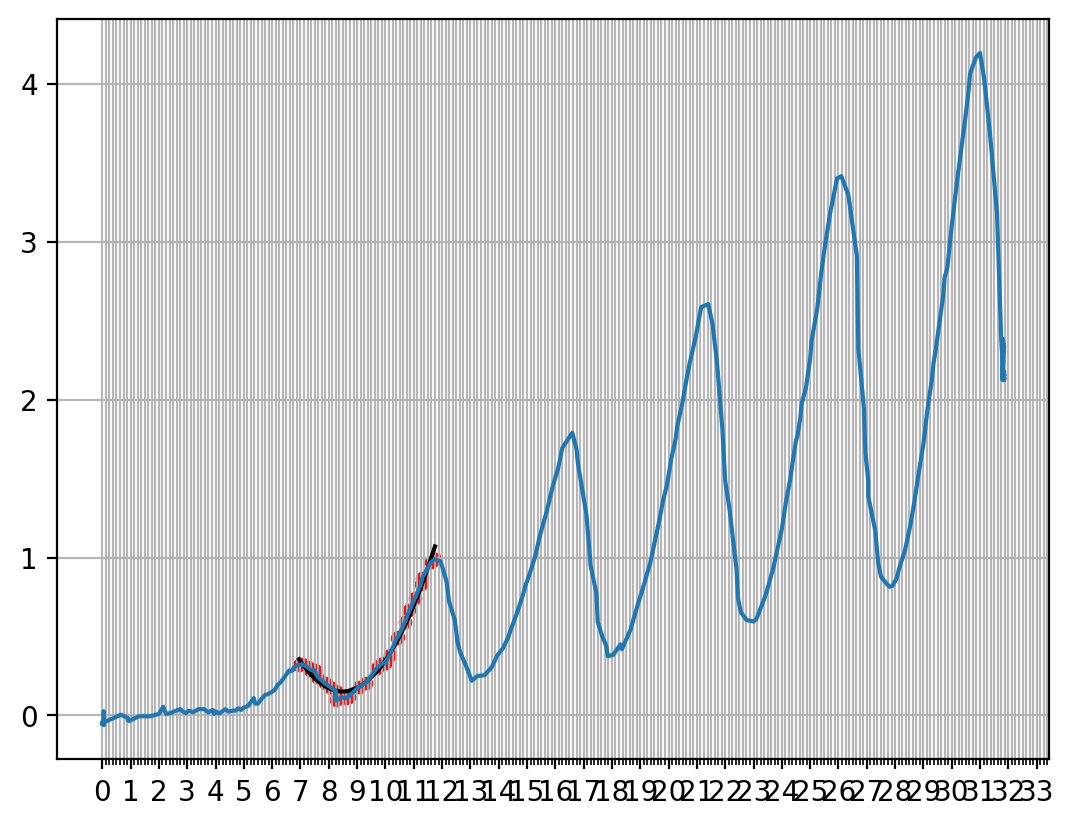

In [13]:
#Allocate the U2/10 Values to an array x
x = pd.read_csv(filein,
                usecols=[2],
               names = ['A1']) 

#Allocate the UA values to an array y
y = pd.read_csv(filein,
                usecols=[1],
                names = ['B1'])

#These lines split the data and convert it all to numeric values for plotting
y = y.iloc[1: , :]
x = x.iloc[1: , :]
ser = pd.Series(x['A1'])
x = pd.to_numeric(ser)

ser = pd.Series(y['B1'])
y = pd.to_numeric(ser)

#Putting the data back together
data = pd.concat([x, y], axis = 1)

#Multiplies all U2 values by 10 as they are recorded as U2/10 in Cassy Lab
data.A1 = data.A1.mul(10)

#plt.scatter(data.A1, data.B1)

#Selects the data points of the trough for polyfitting
newdata = data.iloc[122:152, : ]

#Creates the plot area
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#Plots the trough selected above
plt.scatter(newdata.A1, newdata.B1, s = 15, c = 'red')

#Creates a quadratic fit to the trough data points
p = [1, 2, 3]
p = np.polyfit(newdata.A1, newdata.B1, 2)
ypoly = poly(p[0], p[1], p[2], newdata.A1)

major_ticks = np.arange(0, 101, 1)
minor_ticks = np.arange(0, 101, 0.125)
ax.set_xticks(minor_ticks, minor=True)
ax.set_xticks(major_ticks)

#Plots the quadratic fit
ax.plot(newdata.A1, ypoly, c = 'black')
ax.grid(which = 'minor', alpha = 0.9)
ax.grid(which = 'major', alpha = 0.9)
plt.plot(data.A1, data.B1)

In [ ]:
xmax = np.zeros(int(data.size/2) + 1)
ymax = np.zeros(int(data.size/2) + 1)

In [5]:
#A function that finds the minimum points in the data and allocates them to the array ymax before printing them
def max(y):
    for i in range(2, int(data.size/2)):
        if y[i]>y[i+1] and y[i]>y[i-1]:
            ymax[i] = y[i]
            print(i)

In [6]:
#See above function. These values are then used to select the data points of the trough as seen above
max(y)

NameError: name 'ymax' is not defined

In [7]:
#Defines the form for a quadratic function
def poly(a, b, c, x):
    return a*(x**2) + b*x + c

In [8]:
#Finds the minimum point of the quadratic fit to the selected trough using basic algebra
mi = -p[1]/(2*p[0])
print(mi)
print(poly(p[0],p[1],p[2],mi))

8.487346113921761
0.15163946074239565


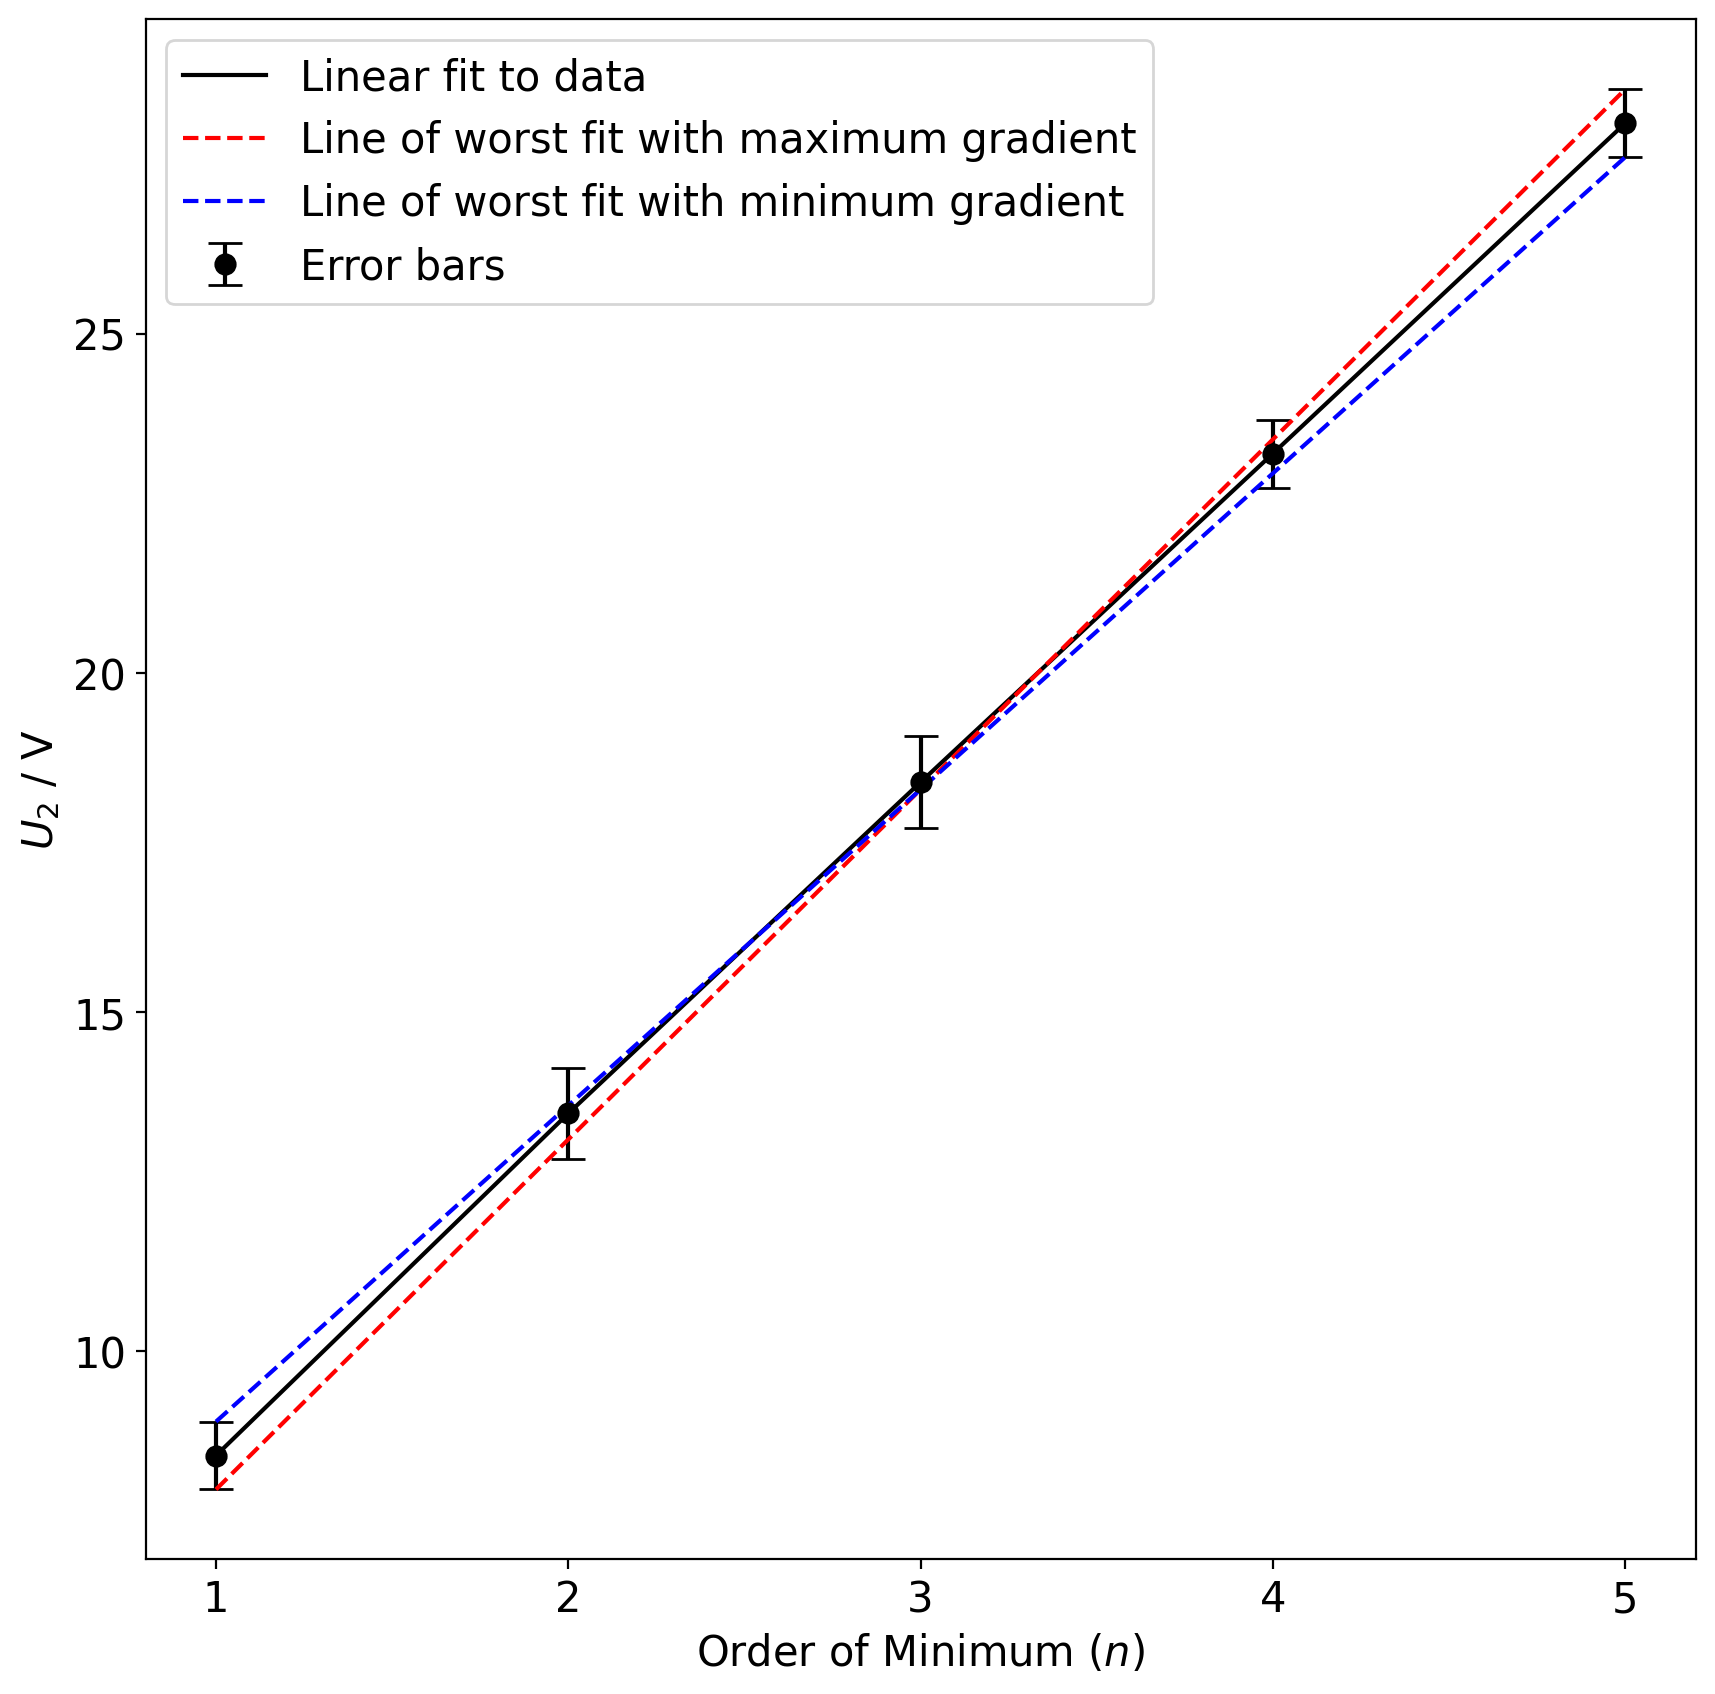

In [20]:
plt.rcParams['font.size'] = 15
#Plots the minimum U2 values against their order, n 
temp = '200'
n = [1,2,3,4, 5]
utwo = pd.read_csv('../Data/u2values.csv')
u = utwo[temp].dropna()
uncertainties = pd.read_csv('../Data/uncertainties.csv')
uncer = uncertainties[temp].dropna()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.errorbar(n,           
             u,              
             yerr=uncer,     
             marker='o',             
             markersize = 7,
             markerfacecolor = 'black',
             color='black',          
             linestyle='none',       
             capsize=6,   
             label = 'Error bars'
             )

ax.set_ylabel('$U_2$ / V')
ax.set_xlabel('Order of Minimum ($n$)')

ax.plot(n, u, c='black', label = 'Linear fit to data')

#Gives the coordinates for the worst fit lines
wf2 = [u[0] + uncer[0], u[4] - uncer[4]]
wf1 = [u[0] - uncer[0], u[4] + uncer[4]]

ax.plot([1, 5], wf1, c='red', linestyle = '--', label = 'Line of worst fit with maximum gradient')
ax.plot([1, 5], wf2, c='blue', linestyle = '--', label = 'Line of worst fit with minimum gradient')

ax.set_xticks([1, 2, 3, 4, 5])
ax.legend(loc = 'upper left')


plt.show()

#Defines a linear function
def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept 

#Calculate the slope and intercept along with their respective errors
popt, pcov = curve_fit(line,n,u)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

In [17]:
slope

4.899691626038653

In [19]:
wf1slope = (wf1[1] - wf1[0])/4
wf2slope = (wf2[1] - wf2[0])/4
print((wf1[1] - wf1[0])/4)
print((wf2[1] - wf2[0])/4)
print((wf1slope - wf2slope)/2)

5.158826995160421
4.658826995160421
0.25
